<a href="https://colab.research.google.com/github/khan-habibullah/ml1/blob/master/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install tensorflow-hub


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


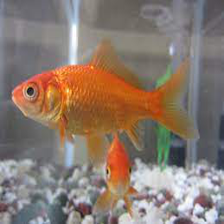

In [5]:
gold_fish = Image.open("/content/golden_fish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [6]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [7]:
gold_fish[np.newaxis, ...]

array([[[[0.43137255, 0.45490196, 0.52156863],
         [0.45882353, 0.47843137, 0.54117647],
         [0.4745098 , 0.48235294, 0.54509804],
         ...,
         [0.31764706, 0.30196078, 0.30588235],
         [0.31764706, 0.30196078, 0.29803922],
         [0.31764706, 0.30196078, 0.29803922]],

        [[0.43529412, 0.45882353, 0.5254902 ],
         [0.4627451 , 0.48235294, 0.54509804],
         [0.47843137, 0.48627451, 0.54901961],
         ...,
         [0.31764706, 0.30196078, 0.30588235],
         [0.31764706, 0.30196078, 0.29803922],
         [0.31764706, 0.30196078, 0.29803922]],

        [[0.45098039, 0.4745098 , 0.54117647],
         [0.47843137, 0.49803922, 0.56078431],
         [0.49411765, 0.50196078, 0.56470588],
         ...,
         [0.32156863, 0.30588235, 0.31372549],
         [0.32156863, 0.30588235, 0.30588235],
         [0.32156863, 0.30588235, 0.30588235]],

        ...,

        [[0.59215686, 0.58431373, 0.58823529],
         [0.57647059, 0.56862745, 0.57254902]

In [8]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 3s 3s/step


(1, 1001)

In [9]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [11]:
image_labels = []
with open("/content/Imagenetlab.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [12]:
image_labels[predicted_label_index]

'goldfish'

In [13]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 2s 0us/step


In [14]:
data_dir

'./datasets/flower_photos'

In [15]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [16]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/850416050_31b3ff7086.jpg'),
 PosixPath('datasets/flower_photos/roses/15566697073_9a214b700e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1446090416_f0cad5fde4.jpg'),
 PosixPath('datasets/flower_photos/roses/15094168139_8f636ffa1d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4608559939_3487bf3b62_n.jpg')]

In [17]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [18]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/850416050_31b3ff7086.jpg'),
 PosixPath('datasets/flower_photos/roses/15566697073_9a214b700e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1446090416_f0cad5fde4.jpg'),
 PosixPath('datasets/flower_photos/roses/15094168139_8f636ffa1d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4608559939_3487bf3b62_n.jpg')]

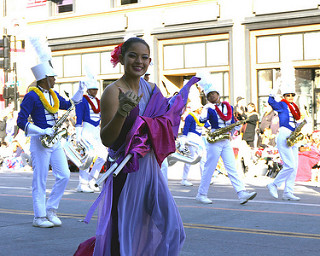

In [31]:
import PIL
PIL.Image.open(str(roses[1]))

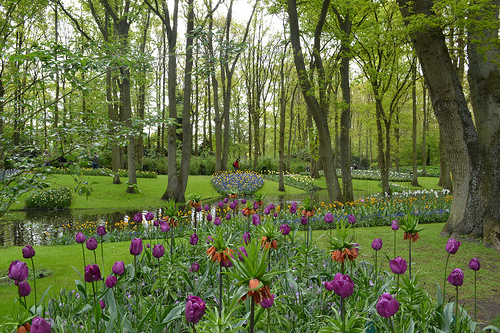

In [32]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [33]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [34]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [35]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/850416050_31b3ff7086.jpg'),
 PosixPath('datasets/flower_photos/roses/15566697073_9a214b700e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1446090416_f0cad5fde4.jpg'),
 PosixPath('datasets/flower_photos/roses/15094168139_8f636ffa1d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4608559939_3487bf3b62_n.jpg')]

In [36]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/850416050_31b3ff7086.jpg'

In [37]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [38]:
img.shape

(325, 500, 3)

In [39]:
cv2.resize(img,(224,224)).shape


(224, 224, 3)

In [40]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [41]:
X = np.array(X)
y = np.array(y)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [43]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [44]:
X[0].shape

(224, 224, 3)

In [45]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [46]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

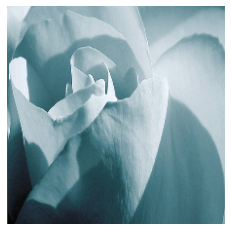

In [47]:
plt.axis('off')
plt.imshow(X[0])

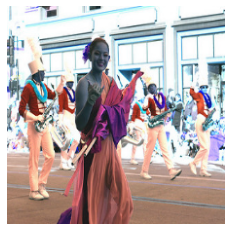

In [48]:
plt.axis('off')
plt.imshow(X[1])

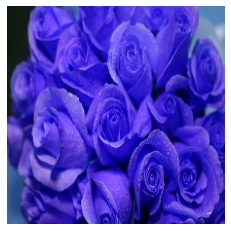

In [49]:
plt.axis('off')
plt.imshow(X[2])

In [50]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 1s 1s/step


array([795, 795, 795])

In [52]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [53]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [54]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 92s 1s/step - loss: 0.8390 - acc: 0.6773
Epoch 2/5
86/86 [==============================] - 91s 1s/step - loss: 0.4296 - acc: 0.8445
Epoch 3/5
86/86 [==============================] - 89s 1s/step - loss: 0.3420 - acc: 0.8859
Epoch 4/5
86/86 [==============================] - 89s 1s/step - loss: 0.2856 - acc: 0.9084
Epoch 5/5
86/86 [==============================] - 89s 1s/step - loss: 0.2473 - acc: 0.9244


In [55]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 30s 964ms/step - loss: 0.3267 - acc: 0.8802


[0.32666048407554626, 0.8801742792129517]